In [ ]:
from featime.featime import *

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

Criando variáveis numéricas e categóricas 

## Install

```sh
pip install featime
```

## How to use

### Criando dataframe aleatório

Criando DataFrame com variáveis categóricas e numéricas

In [ ]:
# Criando o DataFrame
data = {
    'ID_cliente': [random.choice(list(range(1, 101)))for _ in range(100)],
    'data_transacao': [random.choice([202207, 202208, 202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305,
                                      202306, 202307, 202308]) for _ in range(100)],
    'Feat_cat': [random.choice(['A', 'B', 'C']) for _ in range(100)],    
    'Feat_num1': np.random.randint(0, 100, size=100),
    'Feat_num2': np.random.randint(0, 100, size=100)
}
df = pd.DataFrame(data)

In [ ]:
df.head()

,ID_cliente,data_transacao,Feat_cat,Feat_num1,Feat_num2
0,43,202211,A,50,64
1,53,202210,B,81,1
2,30,202307,A,47,86
3,13,202305,B,81,21
4,41,202207,B,56,61


O Dataframe criado tem o ID do cliente aleatório, podendo se repetir em datas diferentes,

In [ ]:
df.groupby('ID_cliente')['data_transacao'].value_counts().sort_values(ascending=False)

ID_cliente  data_transacao
64          202304            3
26          202209            2
92          202303            2
1           202208            1
66          202304            1
                             ..
36          202211            1
35          202301            1
30          202209            1
            202307            1
100         202306            1
Name: count, Length: 96, dtype: int64

### Ajustando datas

A variável data_transacao é a data que ocorreu algum tipo de transação na base. Para o nosso exemplo, teremos a seguinte distribuição das datas:

<Axes: xlabel='data_transacao'>

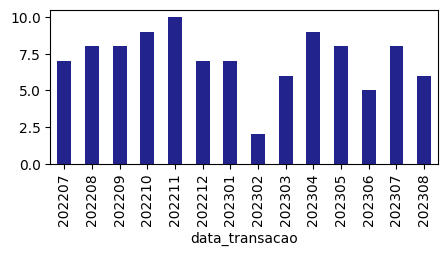

In [ ]:
plt.figure(figsize=(5,2))
df['data_transacao'].value_counts().sort_index().plot.bar(color = '#23238E')

As ``datas suportadas`` precisam estar no formato ``YYYYMMDD``. Por isso, vamos modificar a transação para o primeiro dia dos mês,

In [ ]:
df['data_transacao'] = df['data_transacao'].apply(lambda x: str(x)+'01')

Para criarmos variáveis em janelas, vamos criar uma data de referência chamada "safra_ref". Ela também precisa estar no formato YYYYMMDD

In [ ]:
df['safra_ref'] = '20230701'

### Variáveis numéricas

A partir do ID_cliente do cliente e da data de transação, agrupamos as entradas e calculamos variáveis do tipo 'sum', 'mean' e 'count' que são fornecidas em forma de lista em 'operations' para variáveis numéricas. As variáveis utilizadas são listadas em 'value_var' e calculadas nas janelas de tempo em 'window' para a data de referência em 'ref_time_var'.

In [ ]:
id_cols = ['ID_cliente','safra_ref']
trns_time = 'data_transacao'
ref_time = 'safra_ref'
value_var = ['Feat_num1','Feat_num2']
window = [-1,-2,-3,-6,-9,-12,-15]
operations = ['sum','mean','count']

df_vars_num = featime_in_time(df,id_cols,trns_time,ref_time,value_var,window,operations)

In [ ]:
df_vars_num.head()

,ID_cliente,safra_ref,Feat_num1_sum_1M,Feat_num1_mean_1M,Feat_num1_count_1M,Feat_num1_sum_2M,Feat_num1_mean_2M,Feat_num1_count_2M,Feat_num1_sum_3M,Feat_num1_mean_3M,Feat_num1_count_3M,Feat_num1_sum_6M,Feat_num1_mean_6M,Feat_num1_count_6M,Feat_num1_sum_9M,Feat_num1_mean_9M,Feat_num1_count_9M,Feat_num1_sum_12M,Feat_num1_mean_12M,Feat_num1_count_12M,Feat_num1_sum_15M,Feat_num1_mean_15M,Feat_num1_count_15M,Feat_num2_sum_1M,Feat_num2_mean_1M,Feat_num2_count_1M,Feat_num2_sum_2M,Feat_num2_mean_2M,Feat_num2_count_2M,Feat_num2_sum_3M,Feat_num2_mean_3M,Feat_num2_count_3M,Feat_num2_sum_6M,Feat_num2_mean_6M,Feat_num2_count_6M,Feat_num2_sum_9M,Feat_num2_mean_9M,Feat_num2_count_9M,Feat_num2_sum_12M,Feat_num2_mean_12M,Feat_num2_count_12M,Feat_num2_sum_15M,Feat_num2_mean_15M,Feat_num2_count_15M
0,43,2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,123.0,30.75,4.0,158.0,31.6,5.0,158.0,31.6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,92.0,1.0,250.0,62.5,4.0,305.0,61.0,5.0,305.0,61.0,5.0
1,53,2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,81.00,1.0,111.0,55.5,2.0,111.0,55.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,97.0,48.5,2.0,97.0,48.5,2.0
2,30,2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,34.5,2.0,69.0,34.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,41.0,2.0,82.0,41.0,2.0
3,13,2023-07-01,NaN,NaN,NaN,81.0,81.0,1.0,81.0,81.0,1.0,81.0,81.0,1.0,142.0,71.00,2.0,142.0,71.0,2.0,142.0,71.0,2.0,NaN,NaN,NaN,21.0,21.0,1.0,21.0,21.0,1.0,21.0,21.0,1.0,43.0,21.5,2.0,43.0,21.5,2.0,43.0,21.5,2.0
4,41,2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0,1.0,35.0,35.00,1.0,91.0,45.5,2.0,91.0,45.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,43.0,1.0,43.0,43.0,1.0,104.0,52.0,2.0,104.0,52.0,2.0


In [ ]:
df[df['ID_cliente']==43]

,ID_cliente,data_transacao,Feat_cat,Feat_num1,Feat_num2,safra_ref
0,43,20221101,A,50,64,20230701
26,43,20221201,C,24,63,20230701
63,43,20221001,C,48,31,20230701
79,43,20220801,C,35,55,20230701
81,43,20230101,C,1,92,20230701


### Variáveis categóricas

Para variáveis categóricas, as operações são 'nunique' e mode.


In [ ]:
id_cols = ['ID_cliente','safra_ref']
trns_time = 'data_transacao'
ref_time = 'safra_ref'
value_var = ['Feat_cat']
window = [-1,-2,-3,-6,-9,-12,-15]
operations = ['nunique', mode]

df_vars_cat = featime_in_time(df,id_cols,trns_time,ref_time,value_var,window,operations)

In [ ]:
df_vars_cat.head()

,ID_cliente,safra_ref,Feat_cat_nunique_1M,Feat_cat_mode_1M,Feat_cat_nunique_2M,Feat_cat_mode_2M,Feat_cat_nunique_3M,Feat_cat_mode_3M,Feat_cat_nunique_6M,Feat_cat_mode_6M,Feat_cat_nunique_9M,Feat_cat_mode_9M,Feat_cat_nunique_12M,Feat_cat_mode_12M,Feat_cat_nunique_15M,Feat_cat_mode_15M
0,43,2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,C,2.0,C,2.0,C,2.0,C
1,53,2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,B,1.0,B,1.0,B
2,30,2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,B,2.0,B
3,13,2023-07-01,NaN,NaN,1.0,B,1.0,B,1.0,B,2.0,A,2.0,A,2.0,A
4,41,2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,C,1.0,C,2.0,B,2.0,B


In [ ]:
df[df['ID_cliente']==43]

,ID_cliente,data_transacao,Feat_cat,Feat_num1,Feat_num2,safra_ref
0,43,20221101,A,50,64,20230701
26,43,20221201,C,24,63,20230701
63,43,20221001,C,48,31,20230701
79,43,20220801,C,35,55,20230701
81,43,20230101,C,1,92,20230701
